<a href="https://colab.research.google.com/github/andrejobbs/Data_Science-Sales/blob/main/Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

import plotly.express as px

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("vendas.csv")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
linha, coluna = df.shape

In [ ]:
linha

1000

In [ ]:
coluna

17

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Tratamento de dados

# Cidade

In [ ]:
df.rename(columns = {"City":"Cidade"}, inplace=True)

In [ ]:
df.Cidade.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
df.Cidade.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: Cidade, dtype: int64

# Tipo de Consumidor

In [ ]:
df.rename(columns = {"Customer type":"TipoConsumidor"}, inplace=True)

In [ ]:
df.TipoConsumidor.value_counts()

Member    501
Normal    499
Name: TipoConsumidor, dtype: int64

In [ ]:
df["TipoConsumidor"].replace(to_replace = ["Member"], value = ["Membro"], inplace = True)

In [ ]:
df.TipoConsumidor.unique()

array(['Membro', 'Normal'], dtype=object)

# Gêneros

In [ ]:
df.rename(columns = {"Gender":"Genero"}, inplace=True)

In [ ]:
df.Genero.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df["Genero"].replace(to_replace = ["Female", "Male"], value = ["Feminino", "Masculino"], inplace = True)

In [ ]:
df.Genero.unique()

array(['Feminino', 'Masculino'], dtype=object)

Qual tipo de produto vende mais em cada mês

# Tipo de produto

In [ ]:
df.rename(columns = {"Product line":"TipoProduto"}, inplace=True)

In [ ]:
df.TipoProduto.unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [ ]:
df["TipoProduto"].replace(to_replace = ["Health and beauty", "Electronic accessories", "Home and lifestyle", "Sports and travel","Food and beverages","Fashion accessories"], 
                   value = ["Saúde e beleza", "Acessórios eletrônicos", "Casa e estilo de vida", "Esportes e viagem","Comida e bebida","Moda"], inplace=True)

In [ ]:
df.TipoProduto.unique()

array(['Saúde e beleza', 'Acessórios eletrônicos',
       'Casa e estilo de vida', 'Esportes e viagem', 'Comida e bebida',
       'Moda'], dtype=object)

# Preço unitário

In [ ]:
df.rename(columns = {"Unit price":"PrecoUnitario"}, inplace=True)

# Quantidade

In [ ]:
df.rename(columns = {"Quantity":"Quantidade"}, inplace=True)

# Imposto

In [ ]:
df.rename(columns = {"Tax 5%":"Imposto 5%"}, inplace=True)

# Data

In [ ]:
df.rename(columns = {"Date":"Data"}, inplace=True)

In [ ]:
df.Data = pd.to_datetime(df.Data, format = "%m/%d/%Y")

# Horário

In [ ]:
df.rename(columns = {"Time":"Horario"}, inplace=True)

# Tipo de pagamento


In [ ]:
df.rename(columns = {"Payment":"TipoPagamento"}, inplace=True)

In [ ]:
df.TipoPagamento.unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [ ]:
df["TipoPagamento"].replace(to_replace = ["Ewallet", "Cash", "Credit card"], value = ["Carteira virtual", "Dinheiro", "Cartão"], inplace = True)

In [ ]:
df.TipoPagamento.unique()

array(['Carteira virtual', 'Dinheiro', 'Cartão'], dtype=object)

# Custo

In [ ]:
df.rename(columns = {"cogs":"Custo"}, inplace=True)

# Porcentagem de margem bruta

In [ ]:
df.rename(columns = {"gross margin percentage":"MargemBruta%"}, inplace=True)

# Renda bruta

In [ ]:
df.rename(columns = {"gross income":"RendaBruta"}, inplace=True)

# Avaliação

In [ ]:
df.rename(columns = {"Rating":"Avaliacao"}, inplace=True)

# Relação entre membros/não membros em cada cidade.

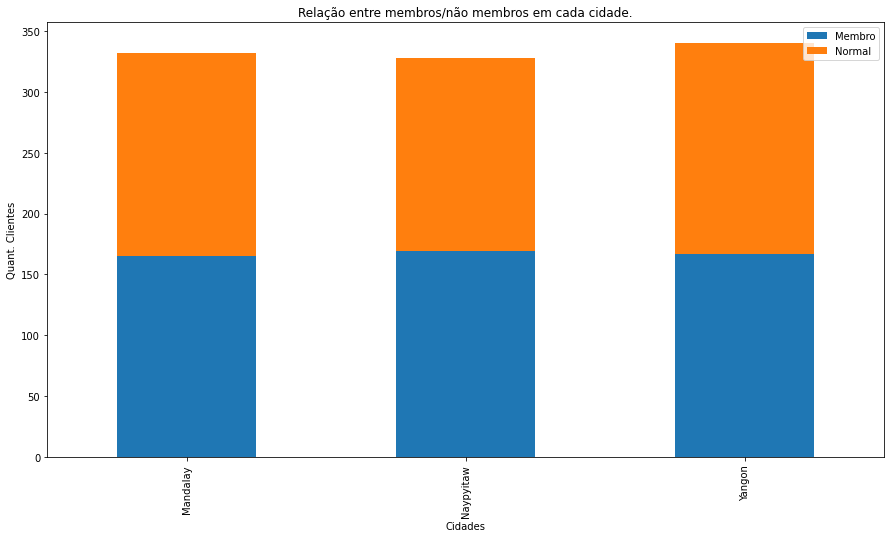

In [ ]:
bar = df.groupby(['Cidade', 'TipoConsumidor']).size().reset_index().pivot(columns='TipoConsumidor', 
                                                                         index='Cidade', values=0)
bar.plot(kind='bar', stacked=True, figsize=(15,8))
plt.legend()

plt.title('Relação entre membros/não membros em cada cidade.')
plt.xlabel('Cidades')
plt.ylabel('Quant. Clientes')
plt.show()

A partir desta análise podemos perceber que o número de vendas de cada cidade é bem próximo, além disso a relação entre clientes que são membros e não membros em cada cidade é muito parecida. Aproximadamente 50% dos clientes do supermercado de cada cidade são membros.

# Tipos de produtos vendidos em cada mês. (Janeiro, Fevereiro e Março)

In [ ]:
df['Mes'] = df['Data'].dt.month

In [ ]:
df.Mes.value_counts(ascending=True)

2    303
3    345
1    352
Name: Mes, dtype: int64

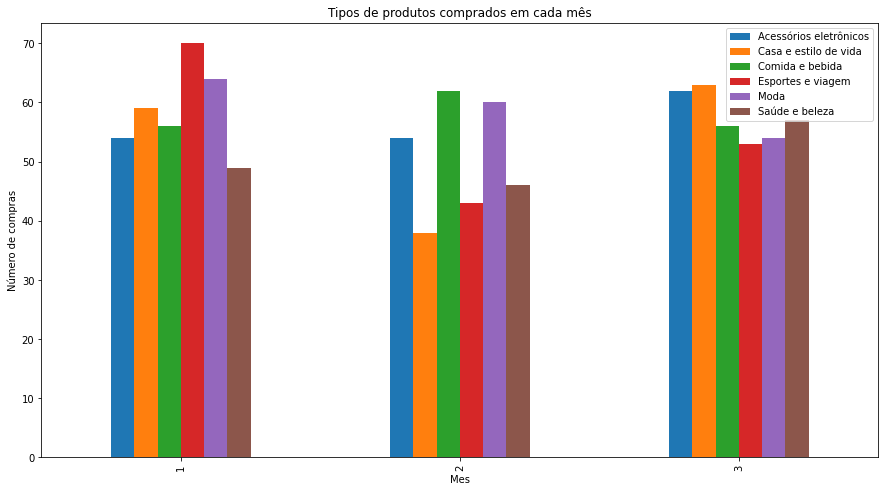

In [ ]:
bar = df.groupby(['Mes', 'TipoProduto']).size().reset_index().pivot(columns='TipoProduto', 
                                                                         index='Mes', values=0)
bar.plot(kind='bar', stacked=False, figsize=(15,8))
plt.legend()

plt.title('Tipos de produtos comprados em cada mês')
plt.xlabel('Mes')
plt.ylabel('Número de compras')
plt.show()

A partir desse gráfico podemos tomar algumas conclusões com relação ao numero de compras de cada tipo de produto em cada mês. Por exemplo:
- No mês 1, o tipo de produto mais comprado são "Esportes e viagem", possivelmente relacionado ao momento do ano em que muitos estão de férias e realizam esse tipo de gasto.
- Já no mês 2, o tipo de produto mais comprado são "Comidas e bebidas", possivelmente por conta dos últimos dias de férias com as pessoas ja em sua cidade aproveitand esses dias.
- Enquanto no mês 3, o tipo de produto mais comprado são "Casa e estilo de vida", as pessoas já se encontram de volta em sua rotina e com gastos mais relacionados ao dia-a-dia.

# Quantidade de vendas de cada tipo de produto dividido por cidade.

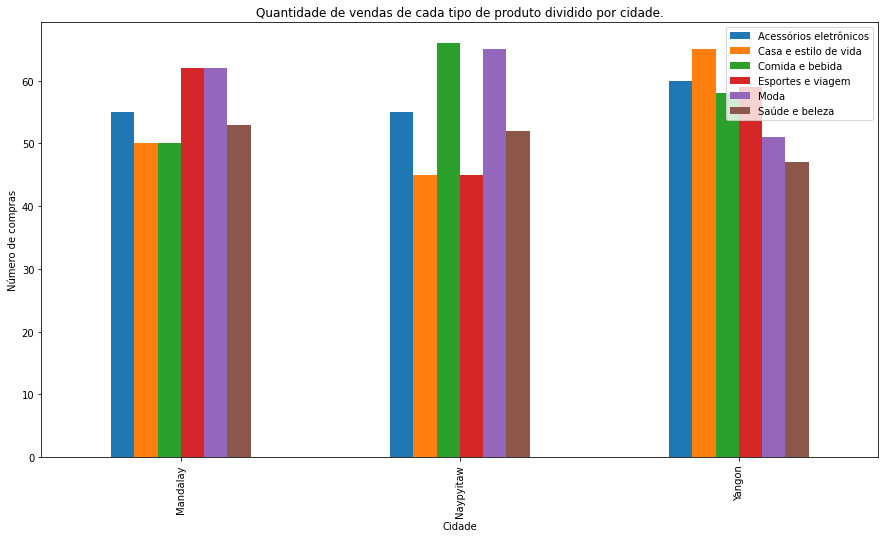

In [ ]:
bar = df.groupby(['Cidade', 'TipoProduto']).size().reset_index().pivot(columns='TipoProduto', 
                                                                         index='Cidade', values=0)
bar.plot(kind='bar', stacked=False, figsize=(15,8))
plt.legend()

plt.title('Quantidade de vendas de cada tipo de produto dividido por cidade.')
plt.xlabel('Cidade')
plt.ylabel('Número de compras')
plt.show()

Esse gráfico nos informa sobre a quantidade de compras de cada tipo de produto dividido pelas cidades. Algumas informações que podem ser tiradas dele são:
- Podemos subentender que Mandalay e Naypyitaw são cidades turísticas da região, pelo número de vendas relacionados a viagem, comida e moda.
- Por outro lado Yangon realiza muitas vendas relacionadas a "Casa e estilo de vida" podendo ser uma cidade mais residencial que as anteriores.

# Separando feminimo/masculino

In [ ]:
df.Genero.unique()

array(['Feminino', 'Masculino'], dtype=object)

In [ ]:
df_h = df[df.Genero == "Masculino"]
df_h.head()

,Invoice ID,Branch,Cidade,TipoConsumidor,Genero,TipoProduto,PrecoUnitario,Quantidade,Imposto 5%,Total,Data,Horario,TipoPagamento,Custo,MargemBruta%,RendaBruta,Avaliacao,Mes
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,2019-03-03,13:23,Cartão,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Membro,Masculino,Saúde e beleza,58.22,8,23.2880,489.0480,2019-01-27,20:33,Carteira virtual,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Masculino,Esportes e viagem,86.31,7,30.2085,634.3785,2019-02-08,10:37,Carteira virtual,604.17,4.761905,30.2085,5.3,2
5,699-14-3026,C,Naypyitaw,Normal,Masculino,Acessórios eletrônicos,85.39,7,29.8865,627.6165,2019-03-25,18:30,Carteira virtual,597.73,4.761905,29.8865,4.1,3
11,529-56-3974,B,Mandalay,Membro,Masculino,Acessórios eletrônicos,25.51,4,5.1020,107.1420,2019-03-09,17:03,Dinheiro,102.04,4.761905,5.1020,6.8,3


In [ ]:
TotalGastoH = df_h.PrecoUnitario.sum()

In [ ]:
df_m = df[df.Genero == "Feminino"]
df_m.head()

,Invoice ID,Branch,Cidade,TipoConsumidor,Genero,TipoProduto,PrecoUnitario,Quantidade,Imposto 5%,Total,Data,Horario,TipoPagamento,Custo,MargemBruta%,RendaBruta,Avaliacao,Mes
0,750-67-8428,A,Yangon,Membro,Feminino,Saúde e beleza,74.69,7,26.1415,548.9715,2019-01-05,13:08,Carteira virtual,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessórios eletrônicos,15.28,5,3.8200,80.2200,2019-03-08,10:29,Dinheiro,76.40,4.761905,3.8200,9.6,3
6,355-53-5943,A,Yangon,Membro,Feminino,Acessórios eletrônicos,68.84,6,20.6520,433.6920,2019-02-25,14:36,Carteira virtual,413.04,4.761905,20.6520,5.8,2
7,315-22-5665,C,Naypyitaw,Normal,Feminino,Casa e estilo de vida,73.56,10,36.7800,772.3800,2019-02-24,11:38,Carteira virtual,735.60,4.761905,36.7800,8.0,2
8,665-32-9167,A,Yangon,Membro,Feminino,Saúde e beleza,36.26,2,3.6260,76.1460,2019-01-10,17:15,Cartão,72.52,4.761905,3.6260,7.2,1


In [ ]:
TotalGastoM = df_m.PrecoUnitario.sum()

In [ ]:
px.pie(names = ["Masculino", "Feminino"], values= [TotalGastoH, TotalGastoM], width=500, height= 500, title = "Valor gasto em compras dividido por sexo")

In [ ]:
px.pie(names = ["Masculino", "Feminino"], values= [len(df_h), len(df_m)], width=500, height= 500, title = "Quantidade de compras realizadas por cada sexo")

Pela análise realizada dos gráficos de pizza anteriores, podemos concluir que embora haja um maior número de compras do sexo feminino, o valor gasto total delas é menor que o valor gasto pelos homens, entretanto, a diferença seja pequena.

In [ ]:
df_mulher = df[df.Genero == "Feminino"]
df_mulher.head()

,Invoice ID,Branch,Cidade,TipoConsumidor,Genero,TipoProduto,PrecoUnitario,Quantidade,Imposto 5%,Total,Data,Horario,TipoPagamento,Custo,MargemBruta%,RendaBruta,Avaliacao,Mes
0,750-67-8428,A,Yangon,Membro,Feminino,Saúde e beleza,74.69,7,26.1415,548.9715,2019-01-05,13:08,Carteira virtual,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessórios eletrônicos,15.28,5,3.8200,80.2200,2019-03-08,10:29,Dinheiro,76.40,4.761905,3.8200,9.6,3
6,355-53-5943,A,Yangon,Membro,Feminino,Acessórios eletrônicos,68.84,6,20.6520,433.6920,2019-02-25,14:36,Carteira virtual,413.04,4.761905,20.6520,5.8,2
7,315-22-5665,C,Naypyitaw,Normal,Feminino,Casa e estilo de vida,73.56,10,36.7800,772.3800,2019-02-24,11:38,Carteira virtual,735.60,4.761905,36.7800,8.0,2
8,665-32-9167,A,Yangon,Membro,Feminino,Saúde e beleza,36.26,2,3.6260,76.1460,2019-01-10,17:15,Cartão,72.52,4.761905,3.6260,7.2,1


In [ ]:
df_mulher_moda = df_mulher[df_mulher.TipoProduto == "Moda"]
df_mulher_comida = df_mulher[df_mulher.TipoProduto == "Comida e bebida"]
df_mulher_acessorios = df_mulher[df_mulher.TipoProduto == "Acessórios eletrônicos"]
df_mulher_esporte = df_mulher[df_mulher.TipoProduto == "Esportes e viagem"]
df_mulher_casa = df_mulher[df_mulher.TipoProduto == "Casa e estilo de vida"]
df_mulher_saude = df_mulher[df_mulher.TipoProduto == "Saúde e beleza"]

In [ ]:
df_homem = df[df.Genero == "Masculino"]
df_homem.head()

,Invoice ID,Branch,Cidade,TipoConsumidor,Genero,TipoProduto,PrecoUnitario,Quantidade,Imposto 5%,Total,Data,Horario,TipoPagamento,Custo,MargemBruta%,RendaBruta,Avaliacao,Mes
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,2019-03-03,13:23,Cartão,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Membro,Masculino,Saúde e beleza,58.22,8,23.2880,489.0480,2019-01-27,20:33,Carteira virtual,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Masculino,Esportes e viagem,86.31,7,30.2085,634.3785,2019-02-08,10:37,Carteira virtual,604.17,4.761905,30.2085,5.3,2
5,699-14-3026,C,Naypyitaw,Normal,Masculino,Acessórios eletrônicos,85.39,7,29.8865,627.6165,2019-03-25,18:30,Carteira virtual,597.73,4.761905,29.8865,4.1,3
11,529-56-3974,B,Mandalay,Membro,Masculino,Acessórios eletrônicos,25.51,4,5.1020,107.1420,2019-03-09,17:03,Dinheiro,102.04,4.761905,5.1020,6.8,3


In [ ]:
df_homem_moda = df_homem[df_homem.TipoProduto == "Moda"]
df_homem_comida = df_homem[df_homem.TipoProduto == "Comida e bebida"]
df_homem_acessorios = df_homem[df_homem.TipoProduto == "Acessórios eletrônicos"]
df_homem_esporte = df_homem[df_homem.TipoProduto == "Esportes e viagem"]
df_homem_casa = df_homem[df_homem.TipoProduto == "Casa e estilo de vida"]
df_homem_saude = df_homem[df_homem.TipoProduto == "Saúde e beleza"]

In [ ]:
px.pie(names = ["Moda", "Comida", "Acessórios eletrônicos", "Esportes e viagem", "Casa e estilo de vida", "Saúde e beleza"],
       values= [len(df_homem_moda), len(df_homem_comida), len(df_homem_acessorios), len(df_homem_esporte), len(df_homem_casa), len(df_homem_saude)],
       width=500, height= 500, title = "Divisão de tipos de produtos comprados por homens")

In [ ]:
px.pie(names = ["Moda", "Comida", "Acessórios eletrônicos", "Esportes e viagem", "Casa e estilo de vida", "Saúde e beleza"],
       values= [len(df_mulher_moda), len(df_mulher_comida), len(df_mulher_acessorios), len(df_mulher_esporte), len(df_mulher_casa), len(df_mulher_saude)],
       width=500, height= 500, title = "Divisão de tipos de produtos comprados por mulheres")

Os gráficos nos informam a respeito do número de compras de cada tipo de produto, sendo que cada gráfico está relacionado a um sexo. Realizando uma análise comparativa concluimos que: 
- Diferente do que pode-se imaginar muitas vezes, o tipo de produto mais comprado pelos homens foi da área de "Saúde e beleza" que foi o menos comprado pelas mulheres.
- Por outro lado, o menos comprado pelos homens foi "Esportes e viagem" que foi o terceiro mais comprado pelas mulheres.

# aaaaaaaaaaa

In [ ]:
df.head()

,Invoice ID,Branch,Cidade,TipoConsumidor,Genero,TipoProduto,PrecoUnitario,Quantidade,Imposto 5%,Total,Data,Horario,TipoPagamento,Custo,MargemBruta%,RendaBruta,Avaliacao,Mes
0,750-67-8428,A,Yangon,Membro,Feminino,Saúde e beleza,74.69,7,26.1415,548.9715,2019-01-05,13:08,Carteira virtual,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessórios eletrônicos,15.28,5,3.8200,80.2200,2019-03-08,10:29,Dinheiro,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,2019-03-03,13:23,Cartão,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Membro,Masculino,Saúde e beleza,58.22,8,23.2880,489.0480,2019-01-27,20:33,Carteira virtual,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Masculino,Esportes e viagem,86.31,7,30.2085,634.3785,2019-02-08,10:37,Carteira virtual,604.17,4.761905,30.2085,5.3,2


In [ ]:
df_regressao = df.copy()

In [ ]:
df_regressao.head()

,Invoice ID,Branch,Cidade,TipoConsumidor,Genero,TipoProduto,PrecoUnitario,Quantidade,Imposto 5%,Total,Data,Horario,TipoPagamento,Custo,MargemBruta%,RendaBruta,Avaliacao,Mes
0,750-67-8428,A,Yangon,Membro,Feminino,Saúde e beleza,74.69,7,26.1415,548.9715,2019-01-05,13:08,Carteira virtual,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessórios eletrônicos,15.28,5,3.8200,80.2200,2019-03-08,10:29,Dinheiro,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,2019-03-03,13:23,Cartão,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Membro,Masculino,Saúde e beleza,58.22,8,23.2880,489.0480,2019-01-27,20:33,Carteira virtual,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Masculino,Esportes e viagem,86.31,7,30.2085,634.3785,2019-02-08,10:37,Carteira virtual,604.17,4.761905,30.2085,5.3,2


In [ ]:
x.drop(columns=["Data", "Horario", "Invoice ID"], inplace = True)

In [ ]:
x.head(1)

,Branch,Cidade,TipoConsumidor,Genero,TipoProduto,PrecoUnitario,Quantidade,Imposto 5%,Total,TipoPagamento,Custo,MargemBruta%,RendaBruta,Avaliacao,Mes
0,A,Yangon,Membro,Feminino,Saúde e beleza,74.69,7,26.1415,548.9715,Carteira virtual,522.83,4.761905,26.1415,9.1,1


In [ ]:
df_regressao['Branch'] = df_regressao.Branch.astype(object)
df_regressao['Cidade'] = df_regressao.Cidade.astype(object)
df_regressao['TipoConsumidor'] = df_regressao.TipoConsumidor.astype(object)
df_regressao['Genero'] = df_regressao.Genero.astype(object)
df_regressao['TipoProduto'] = df_regressao.TipoProduto.astype(object)
df_regressao['TipoPagamento'] = df_regressao.TipoPagamento.astype(object)

In [ ]:
df_regressao['Branch'].replace(to_replace = ["A", "B", "C"], value = [0, 1, 2], inplace = True)
df_regressao['Cidade'].replace(to_replace = ["Yangon", "Mandalay", "Naypyitaw"], value = [0, 1, 2], inplace = True)
df_regressao['TipoConsumidor'].replace(to_replace = ["Membro", "Normal"], value = [0, 1], inplace = True)
df_regressao['Genero'].replace(to_replace = ["Feminino", "Masculino"], value = [0, 1], inplace = True)
df_regressao['TipoProduto'].replace(to_replace = ["Saúde e beleza", "Acessórios eletrônicos", "Casa e estilo de vida", "Esportes e viagem","Comida e bebida","Moda"], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_regressao['TipoPagamento'].replace(to_replace = ["Carteira virtual", "Dinheiro", "Cartão"], value = [0, 1, 2], inplace = True)

In [ ]:
x = df_regressao

In [ ]:
x.head()

,Branch,Cidade,TipoConsumidor,Genero,TipoProduto,PrecoUnitario,Quantidade,Imposto 5%,Total,TipoPagamento,Custo,MargemBruta%,RendaBruta,Avaliacao,Mes
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,4.761905,26.1415,9.1,1
1,2,2,1,0,1,15.28,5,3.8200,80.2200,1,76.40,4.761905,3.8200,9.6,3
2,0,0,1,1,2,46.33,7,16.2155,340.5255,2,324.31,4.761905,16.2155,7.4,3
3,0,0,0,1,0,58.22,8,23.2880,489.0480,0,465.76,4.761905,23.2880,8.4,1
4,0,0,1,1,3,86.31,7,30.2085,634.3785,0,604.17,4.761905,30.2085,5.3,2


In [ ]:
y = df_regressao.Avaliacao.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
x_train.shape

(800, 15)

In [ ]:
x_test.shape

(200, 15)

In [ ]:
y_train.shape

(800,)

In [ ]:
y_test.shape

(200,)

In [ ]:
modelos = {
    "LinearRegression": LinearRegression()
    }

In [ ]:
 def fit_and_score(modelos, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in modelos.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(modelos = modelos, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

In [ ]:
model_scores

{'LinearRegression': 1.0}